# Test pipeline from IMCprocess

## Create Img_adata object from csv input files
It is noted that csv file should have columns 'X_position' and 'Y_position'. Since csv output from Imacyte do not have X and Y coordinates, we need to add them from histogram csv output

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import os, sys
sys.path.append(os.path.join('..'))

import IMCprocess.img_anndata as ia
from IMCprocess.img_anndata.img_anndata import Img_anndata
from IMCprocess.utils import utils as ut
from IMCprocess.clustifier import clustifier as cl

In [3]:
def add_XY(histocat_csv, Imacyte_csv):
    new_df_ls = []
    for raw, new in zip(histocat_csv, Imacyte_csv):
        raw_df = pd.read_csv(raw)
        new_df = pd.read_csv(new, index_col=0)
        new_df['X_position'] = np.array(raw_df['X_position'])
        new_df['Y_position'] = np.array(raw_df['Y_position'])
        new_df_ls.append(new_df)
    return new_df_ls

In [4]:
histocat_csv = ['../data/20211022_testTMA1_s0_a2_ac.csv', 
                '../data/20211022_testTMA1_s0_a4_ac.csv',
                '../data/20211022_testTMA1_s0_a5_ac.csv',
                ]
Imacyte_csv = ['../data/ROI002_Basal-like_BC_mean_aggregated.csv',
               '../data/ROI004_ERPR+BC_mean_aggregated.csv',
               '../data/ROI005_Her2+BC_mean_aggregated.csv'
               ]
df_ls = add_XY(histocat_csv, Imacyte_csv)

## Create img_anndata objects for specific projects

* The data matrices is created as anndata (https://anndata.readthedocs.io/en/latest/)
* Merge intensity table of all images and save as adata variable inside Img_anndata class
* Observation table: img_id, this img_id is stored as table in adata variable
* Spatial info: X, Y

In [5]:
# input is a list of image dataframes and image ids
Img_proj = Img_anndata(dfs=df_ls, img_ids=['R2', 'R4','R5'])

../IMCprocess/img_anndata/img_anndata.py:44: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ada = sc.AnnData(df_sc)
/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
../IMCprocess/img_anndata/img_anndata.py:44: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ada = sc.AnnData(df_sc)
/Users/pattama/Desktop/UiB/venv_folder/IMCprocess_venv/lib/python3.8/site-packages/anndata/_core/anndata.py:121: Imp

In [6]:
Img_proj.adata

AnnData object with n_obs × n_vars = 13170 × 28
    obs: 'img_id'
    obsm: 'spatial'

In [7]:
Img_proj.adata.obs

,img_id
Cell_id,
1_0,R2
2_0,R2
3_0,R2
4_0,R2
5_0,R2
...,...
4714_2,R5
4715_2,R5
4716_2,R5


In [8]:
# Call intensity marker data frame from adata object
Img_proj.adata.to_df()

,CD163_,CD31_CD34_,CD3_,CD44_,CD4_,CD68_,CD8_,CK5_6_,Cleaved_caspase3_,ER_,...,PD1_,PDGFRa_,PDGFRb_,PDL1_,Vimentin_,YAP1_,aSMA_,pSMAD2_,pSTAT3_,panKeratin_
Cell_id,,,,,,,,,,,,,,,,,,,,,
1_0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000
2_0,0.000000,0.0,0.042857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.157143,0.000000,0.000000,0.000000,0.000000,0.000000
3_0,0.000000,0.0,0.000000,0.562500,0.000000,0.541667,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.979167,0.625000,0.000000,0.145833,0.083333,0.000000
4_0,0.000000,0.0,0.000000,0.190476,0.000000,0.238095,0.000000,0.0,0.0,0.0,...,0.285714,0.000000,0.000000,0.0,0.428571,0.285714,0.095238,0.238095,0.190476,0.000000
5_0,0.000000,0.0,0.045454,0.068182,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.068182,0.022727,0.000000,0.0,0.318182,0.272727,0.000000,0.022727,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714_2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4715_2,0.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4716_2,0.298077,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.048077,0.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.009615


## Phenograph Clustering level1

In [9]:
Img_proj.adata.var_names

Index(['CD163_', 'CD31_CD34_', 'CD3_', 'CD44_', 'CD4_', 'CD68_', 'CD8_',
       'CK5_6_', 'Cleaved_caspase3_', 'ER_', 'E_Cadherin_', 'FAP_', 'GATA3_',
       'GranzymeB_', 'Her2_', 'Keratin8_18_', 'Ki67_', 'MCAM_', 'PD1_',
       'PDGFRa_', 'PDGFRb_', 'PDL1_', 'Vimentin_', 'YAP1_', 'aSMA_', 'pSMAD2_',
       'pSTAT3_', 'panKeratin_'],
      dtype='object')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.12308883666992188 seconds


TypeError: Expected list, got numpy.ndarray

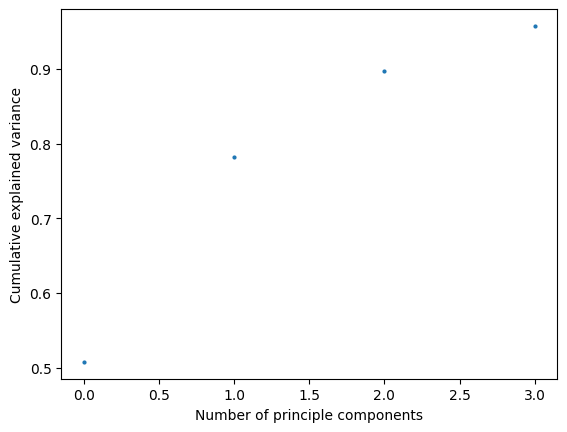

In [10]:
# choose marker for level 1 clustering
markers1 = ['CD31_CD34_','CD3_','Vimentin_','panKeratin_','CD68_']
Img_proj.cluster_phenograph(Img_proj.adata,markers1, name_level = 'level1')

<AxesSubplot:title={'center':'PhenoGraph_clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

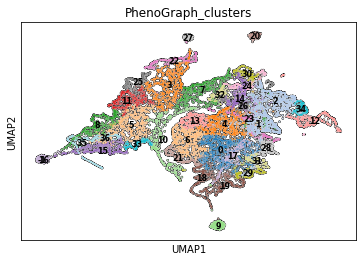

In [ ]:
ut.plt_umap(Img_proj.adata_dict['level1'], 'PhenoGraph_clusters')

{'heatmap_ax': <AxesSubplot:>,
 'groupby_ax': <AxesSubplot:xlabel='PhenoGraph_clusters'>,
 'dendrogram_ax': <AxesSubplot:>}

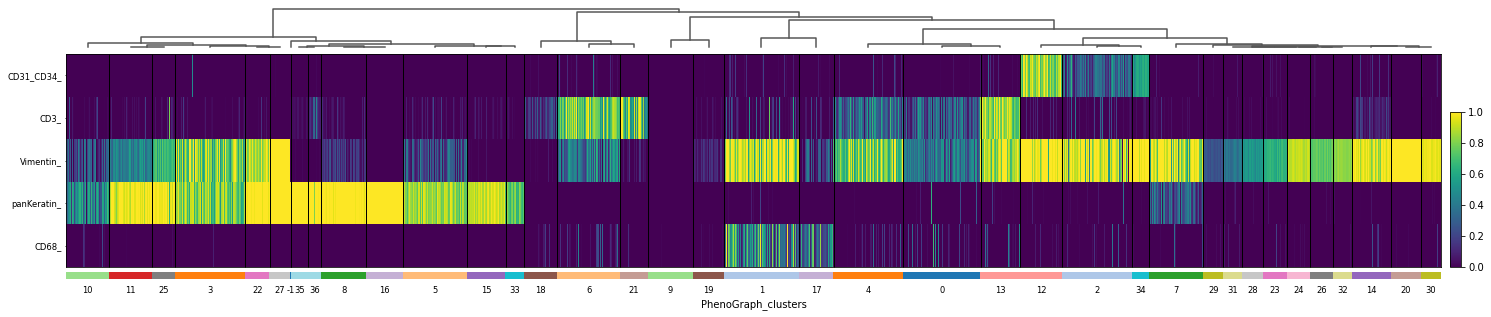

In [ ]:
ut.heatmap_dendrogram(Img_proj.adata_dict['level1'], 'PhenoGraph_clusters', (25,5), markers = markers1)

/Users/pattama/.pyenv/versions/3.8.5/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/Users/pattama/.pyenv/versions/3.8.5/lib/python3.8/site-packages/anndata/_core/anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'img_id' as categorical


{'heatmap_ax': <AxesSubplot:>,
 'groupby_ax': <AxesSubplot:xlabel='PhenoGraph_clusters'>,
 'dendrogram_ax': <AxesSubplot:>}

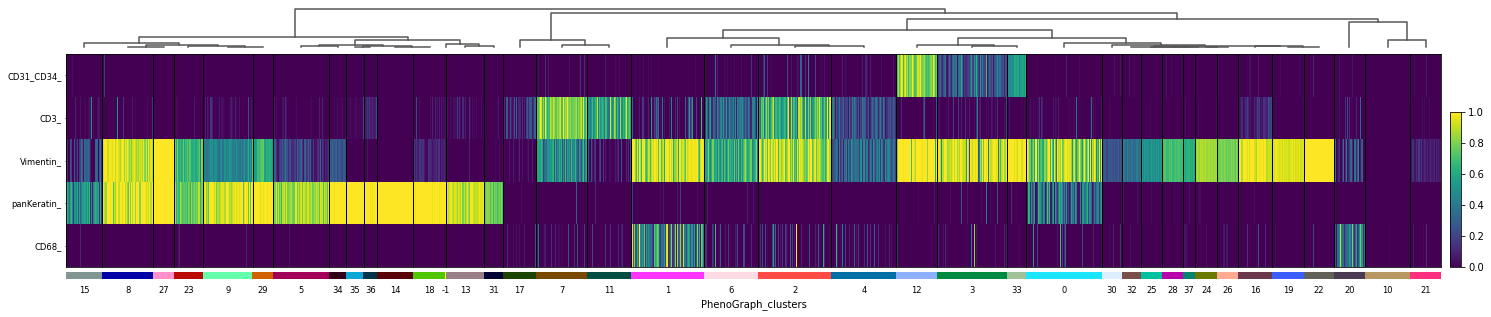

In [ ]:
ut.heatmap_dendrogram(Img_proj.adata_dict['level1'], 'PhenoGraph_clusters', (25,5), markers = markers1)